<a href="https://colab.research.google.com/github/raviteja-padala/NLP/blob/main/Analysing_Drug_review_data/Drug_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Exploratory Data Analysis of Drug Reviews: Uncovering Insights from Patient Feedback"

## Objective:

The objective of this analysis is to explore and gain insights from a dataset containing drug reviews. The dataset includes information about drug names, medical conditions, patient reviews, ratings, dates, and useful counts.


**Description:**

In this analysis, we have performed a comprehensive exploration of the drug review dataset, covering various aspects of the data, including drug utilization, health conditions, reviews, ratings, dates, and more. The analysis includes the following components:

**1. Data Overview:**
   - Importing necessary libraries.
   - Downloading the Drug Review dataset from the UCI Machine Learning Repository.
   - Displaying the shape and information about the dataset.

**2. Unique Counts:**
   - Calculating and displaying the number of unique values for key columns, such as drug names, health conditions, reviews, ratings, dates, and useful counts.

**3. Exploring Drug Names:**
   - Analyzing the unique drug names in the dataset.
   - Identifying the top 20 most frequently prescribed drugs.
   - Visualizing the top 20 drugs using a countplot.

**4. Word Cloud of Drug Names:**
   - Creating a word cloud to visualize drug names' frequency in reviews.

**5. Exploring Health Conditions:**
   - Analyzing the unique health conditions in the dataset.
   - Identifying the top 10 most frequently mentioned health conditions.
   - Visualizing the top 10 health conditions using a countplot.

**6. Word Cloud of Health Conditions:**
   - Creating a word cloud to visualize health condition names' frequency in reviews.

**7. Exploring Reviews:**
   - Analyzing the unique reviews in the dataset.
   - Identifying reviews with the highest and lowest word counts.
   - Calculating statistics on review lengths.

**8. Exploring Ratings:**
   - Descriptive statistics of ratings.
   - Distribution of ratings and their percentages.
   - Temporal analysis of ratings over the years.

**9. Exploring Dates:**
   - Converting the 'date' column to datetime format.
   - Extracting year, month, and day information from dates.
   - Analyzing the first and last review dates in the dataset.

**10. Yearwise reviews Analysis:**
    - Analyzing reviews per year.
    - Yearwise analysis of health conditions and drug names.

**11. Ratings per Drug:**
   

The analysis includes data exploration, data visualization, and statistical analysis. It covers various aspects of the dataset, providing insights into drug utilization, health conditions, patient reviews, ratings, and temporal trends.


# Import Libraries and Dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

# Download the Drug Review dataset in ZIP format from the UCI Machine Learning Repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2023-10-09 06:57:30--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [       <=>          ]  41.00M  31.3MB/s    in 1.3s    

2023-10-09 06:57:32 (31.3 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]



In [ ]:
# Unzip the downloaded ZIP archive file (drug review dataset)
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [ ]:
# Display the first 5 lines of the 'drugsComTrain_raw.tsv' file
!head -n5 drugsComTrain_raw.tsv

	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."""	8.0	April 27, 2010	192
92703	Lyb

In [ ]:
# Read the training dataset from 'drugsComTrain_raw.tsv' into df_train
# Read the testing dataset from 'drugsComTest_raw.tsv' into df_test
df_train = pd.read_table('drugsComTrain_raw.tsv')
df_test = pd.read_table('drugsComTest_raw.tsv')

# Concatenate the training and testing DataFrames vertically (along axis 0) into df_main
df_main = pd.concat([df_train, df_test], axis=0)

# Display the first few rows of the concatenated DataFrame df_main
df_main.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
# drop unnamed column
df_main.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
#shape of the dataset
df_main.shape

(215063, 6)

In [ ]:
#info of the dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    213869 non-null  object 
 2   review       215063 non-null  object 
 3   rating       215063 non-null  float64
 4   date         215063 non-null  object 
 5   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.5+ MB


In [ ]:
# describing the data
df_main.describe()

,rating,usefulCount
count,215063.000000,215063.000000
mean,6.990008,28.001004
std,3.275554,36.346069
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
# checking if the data contains any NULL values
df_main.isnull().sum()

drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
# creating a copy of dataset
df = df_main.copy()

In [ ]:
# Calculate the percentage of missing data in the 'condition' column

# Get the total size of the dataset (number of rows)
total_size = df.shape[0]
print("Total Size of the dataset:", total_size)

# Count the number of null values in the 'condition' column
total_nulls = df['condition'].isnull().sum()
print("Null values:", total_nulls)

# Calculate the percentage of missing values
percentage_missing = (total_nulls / total_size) * 100
print("Percentage of Missing Values:", percentage_missing)


Total Size of the dataset: 215063
Null values: 1194
Percentage of Missing Values: 0.5551861547546533


***Observation***:

There are 1194 null values in condition column, to be handled before proceeding for model building.

In [ ]:
# finding unique counts
unique_counts = df.nunique()
print(unique_counts)

drugName         3671
condition         916
review         128478
rating             10
date             3579
usefulCount       397
dtype: int64


***Observation***:

- `drugName`: There are 3,671 unique drug names in the dataset.
- `condition`: There are 916 unique medical conditions for which drugs were prescribed.
- `review`: There are 128,478 unique reviews in the dataset.
- `rating`: There are 10 unique rating values. This suggests that the ratings may be on a scale from 1 to 10.
- `date`: There are 3,579 unique date values, indicating that there are reviews from various dates.
- `usefulCount`: There are 397 unique values for the count of users who found the reviews useful.



# Exploring the dataset columnwise

## Exploring drugName	column

In [ ]:
# finding unique counts
df['drugName'].nunique()

3671

***Observation***:

Among the 215,063 entries in the dataset, there are 3,671 unique drug names that have been prescribed to patients.

In [ ]:
#top 20 drugs prescribed
df['drugName'].value_counts().nlargest(10)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: drugName, dtype: int64

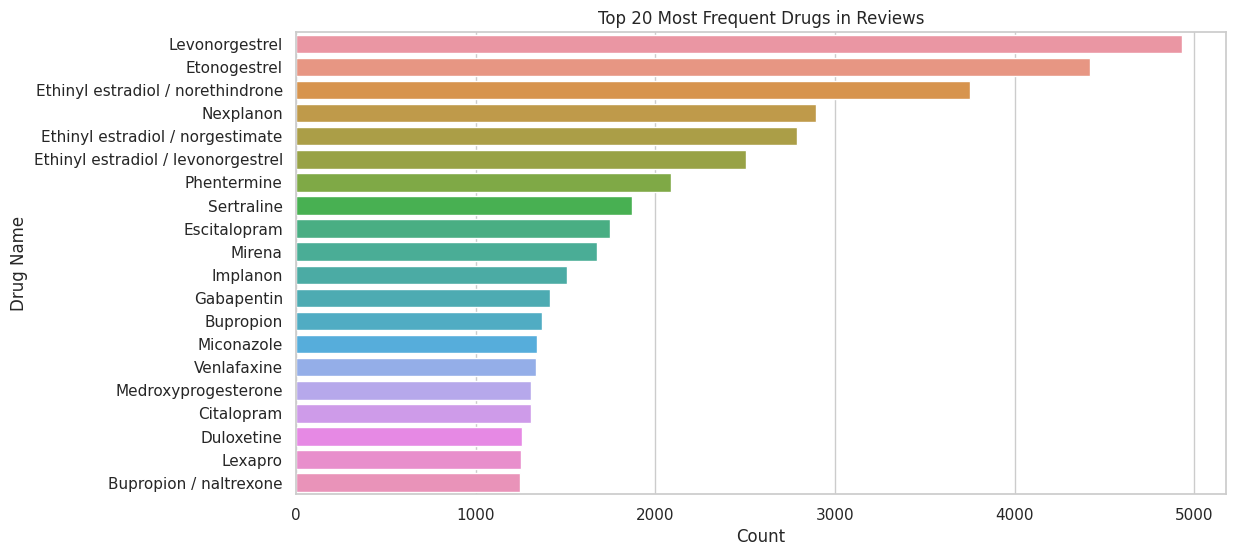

In [ ]:
# Set the style of Seaborn to 'whitegrid'
sns.set(style="whitegrid")

# Get the top 20 drugs based on their frequency
top_20_drugs = df['drugName'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 drugs
df_top_20 = df[df['drugName'].isin(top_20_drugs)]

# Adjust the figure size for optimal presentation
plt.figure(figsize=(12, 6))

# Create the countplot for the top 20 drugs
sns.countplot(y='drugName', data=df_top_20, order=top_20_drugs)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.title('Top 20 Most Frequent Drugs in Reviews')

# Display the plot
plt.show()


***Observation***:


1. **Prevalence of Contraceptives**: Several of the top 10 drugs, including Levonorgestrel(4930 mentions), Etonogestrel(4421 mentions), and various forms of Ethinyl estradiol combinations, are commonly used in contraceptive methods. This suggests that contraception is a significant aspect of healthcare and patient discussions in this dataset.

2. **Contraceptive Implants**: Nexplanon (2892 mentions), a contraceptive implant, is among the top mentions, indicating its popularity as a birth control option among patients.

3. **Variety of Antidepressants**: Sertraline(1868 mentions) and Escitalopram(1747 mentions), both antidepressants, feature prominently in the list. This suggests a substantial focus on mental health and the use of antidepressant medications in patient reviews.

4. **Weight Management**: Phentermine(2085 mentions), an appetite suppressant used for weight management, is in the top 10. This indicates that weight-related issues and treatments are also prevalent topics in the dataset.

5. **Healthcare Trends**: The list reflects current healthcare trends, with a focus on **reproductive health**, **mental health**, and **weight-related issues**, aligning with the broader health concerns of society.



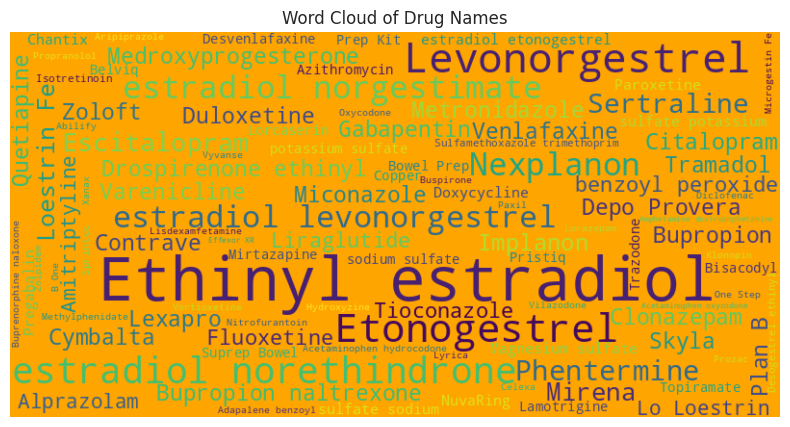

In [ ]:
#wordcloud of Drugnames
from wordcloud import WordCloud

# Combine all drug names into a single string
drug_names_text = ' '.join(df['drugName'])

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(
    width=800,             # Width of the word cloud image
    height=400,            # Height of the word cloud image
    background_color='orange',  # Background color of the word cloud
    max_words=100,         # Maximum number of words to display
    colormap='viridis',    # Color map for the word cloud
    contour_color='steelblue',  # Color of word cloud contour lines
    contour_width=2,       # Width of word cloud contour lines
    relative_scaling=0.5,  # Scaling factor for word frequency
    random_state=42        # Seed for random word placement (for reproducibility)
).generate(drug_names_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud of Drug Names')
plt.show()


In [ ]:
# Calculate value counts for the 'drugName' column
drug_counts = df['drugName'].value_counts()

# Find drug names with value counts equal to 1
drug_names_with_count_1 = drug_counts[drug_counts == 1]

# Display the drug names with value counts equal to 1
print(drug_names_with_count_1)

print("Count of drugs that are mentioned only once", len(drug_names_with_count_1))

Acetic acid / hydrocortisone                      1
Children's Dimetapp Decongestant Infant           1
Todays Health Nasal  Relief Extra Moisturizing    1
Benadryl Allergy Sinus                            1
Oxydose                                           1
                                                 ..
Melpaque HP                                       1
Cortisone                                         1
Reyataz                                           1
Striant                                           1
Allergy DN PE                                     1
Name: drugName, Length: 798, dtype: int64
Count of drugs that are mentioned only once 798


## Exploring condition column

In [ ]:
# finding unique counts
df['condition'].nunique()

916

  ***Observation***:

  Among the 215,063 entries in the dataset, it's noteworthy that there are as many as 798 unique drugs that are mentioned only once.

In [ ]:
#top 20 health conditions
df['condition'].value_counts().nlargest(10)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

In [ ]:
# Calculate value counts for the 'condition' column
condition_counts = df['condition'].value_counts()

# Calculate the percentages
condition_percentages = round((condition_counts / len(df)) * 100,2)

# Combine counts and percentages into a DataFrame
condition_summary = pd.DataFrame({'Counts': condition_counts, 'Percentages%': condition_percentages})

# Display the top 10 conditions with counts and percentages
top_10_conditions = condition_summary.head(10)
print(f"{top_10_conditions}")

                 Counts  Percentages%
Birth Control     38436         17.87
Depression        12164          5.66
Pain               8245          3.83
Anxiety            7812          3.63
Acne               7435          3.46
Bipolar Disorde    5604          2.61
Insomnia           4904          2.28
Weight Loss        4857          2.26
Obesity            4757          2.21
ADHD               4509          2.10


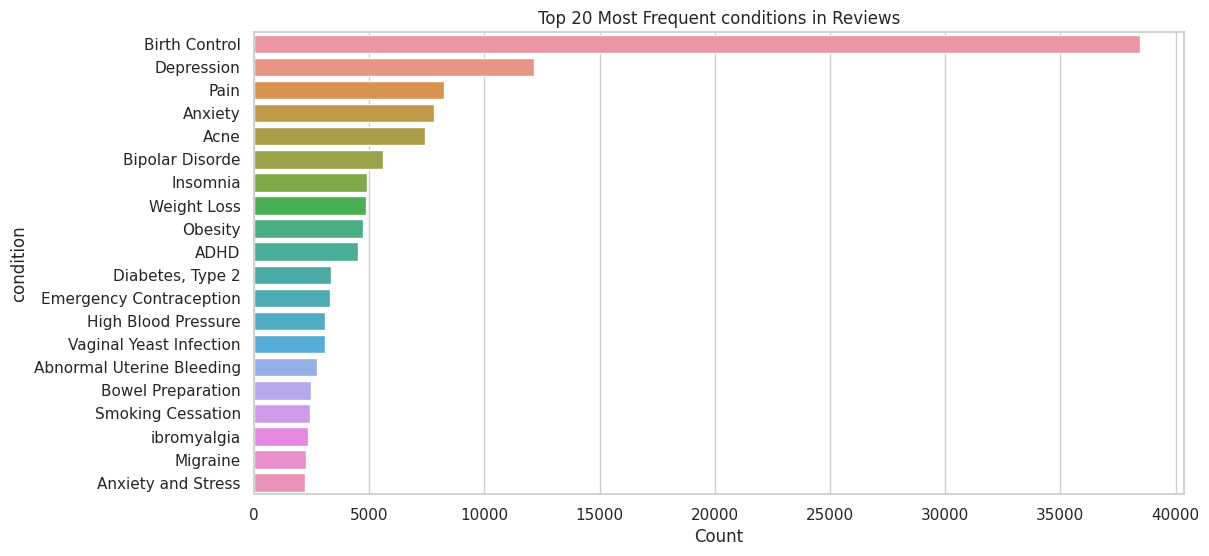

In [ ]:
# Set the style of Seaborn to 'whitegrid'
sns.set(style="whitegrid")

# Get the top 20 drugs based on their frequency
top_20_drugs = df['condition'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 drugs
df_top_20 = df[df['condition'].isin(top_20_drugs)]

# Adjust the figure size for optimal presentation
plt.figure(figsize=(12, 6))

# Create the countplot for the top 20 drugs
sns.countplot(y='condition', data=df_top_20, order=top_20_drugs)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('condition')
plt.title('Top 20 Most Frequent conditions in Reviews')

# Display the plot
plt.show()

***Observation***:


1. **Prevalence of Birth Control (38,436 mentions)**: "Birth Control" is the most commonly mentioned health condition. This suggests that contraception is a prevalent topic in patient reviews and healthcare discussions, emphasizing the importance of reproductive health.

2. **High Occurrence of Depression (12,164 mentions)**: The high frequency of "Depression" indicates a significant focus on mental health issues. Patients are actively discussing their experiences with depression and related treatments.

3. **Pain Management (8,245 mentions)**: "Pain" is frequently discussed, reflecting the importance of pain management in healthcare. Patients are sharing their insights on various types of pain and their treatments.

4. **Anxiety Awareness (7,812 mentions)**: The mention of "Anxiety" is substantial, highlighting the significance of mental health discussions, specifically related to anxiety disorders and treatments.

5. **Skincare and Dermatology (7,435 mentions)**: "Acne" is frequently mentioned, indicating that skincare and dermatological issues are actively reviewed and discussed by patients.

6. **Bipolar Disorder (5,604 mentions)**: The mention of "Bipolar Disorder" emphasizes the importance of mental health conditions that require specific medications and therapies.

7. **Sleep Disorders (4,904 mentions)**: Insomnia, or sleep disorders, is a notable concern among patients, reflecting discussions on sleep-related issues.

8. **Weight-Related Topics (4,857 mentions)**: "Weight Loss" and "Obesity" are frequently mentioned, indicating the significance of weight management and addressing obesity in healthcare discussions.

9. **Neurological Condition (4,509 mentions)**: Attention-Deficit/Hyperactivity Disorder (ADHD) is commonly mentioned, highlighting the prevalence of this neurological condition in patient experiences.

These observations shed light on the most frequently discussed health conditions in the dataset, demonstrating the diversity of healthcare concerns and emphasizing the importance of reproductive health, mental health, pain management, skincare, weight-related topics, and neurological conditions in patient reviews.

In [ ]:
# Calculate value counts for the condition column
condition_counts = df['condition'].value_counts()

# Find condition names with value counts equal to 1
condition_names_with_count_1 = condition_counts[condition_counts == 1]

# Display the condition names with value counts equal to 1
print(condition_names_with_count_1)

print("Count of conditions that are mentioned only once", len(condition_names_with_count_1))

Gastric Cance                                   1
95</span> users found this comment helpful.     1
121</span> users found this comment helpful.    1
61</span> users found this comment helpful.     1
Q Feve                                          1
                                               ..
Systemic Candidiasis                            1
Wilson's Disease                                1
unctional Gastric Disorde                       1
Sepsis                                          1
105</span> users found this comment helpful.    1
Name: condition, Length: 113, dtype: int64
Count of conditions that are mentioned only once 113


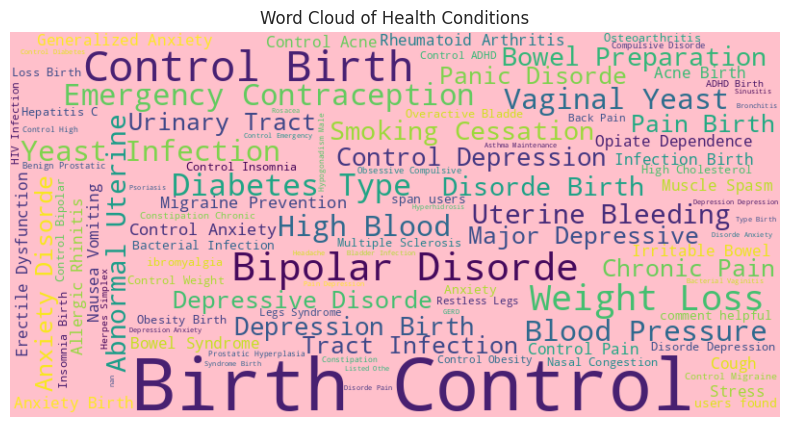

In [ ]:
# Convert non-string values in the 'condition' column to strings
df['condition'] = df['condition'].astype(str)

# Combine all condition names into a single string
condition_text = ' '.join(df['condition'])

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(
    width=800,             # Width of the word cloud image
    height=400,            # Height of the word cloud image
    background_color='pink',  # Background color of the word cloud
    max_words=100,         # Maximum number of words to display
    colormap='viridis',    # Color map for the word cloud
    contour_color='steelblue',  # Color of word cloud contour lines
    contour_width=2,       # Width of word cloud contour lines
    relative_scaling=0.5,  # Scaling factor for word frequency
    random_state=42        # Seed for random word placement (for reproducibility)
).generate(condition_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud of Health Conditions')
plt.show()

## Exploring review column

In [ ]:
# unique reviews
df['review'].nunique()

128478

In [ ]:
# Find the review with the highest word count
max_length_review = df['review'].str.split().apply(len).idxmax()
highest_length_review = df.loc[max_length_review, 'review']

# Find the review with the lowest word count
min_length_review = df['review'].str.split().apply(len).idxmin()
lowest_length_review = df.loc[min_length_review, 'review']

# Calculate the review lengths
Maximum_Review_Length = df['review'].str.split().apply(len).max()
Average_review_length = round(df['review'].str.split().apply(len).mean())
Minimum_Review_Length = df['review'].str.split().apply(len).min()

# Display the results
print("Maximum Review Length:", Maximum_Review_Length)
print("\nAverage Review Length:", Average_review_length)
print("\nMinimum Review Length:", Minimum_Review_Length)


Maximum Review Length: 1894

Average Review Length: 85

Minimum Review Length: 1


In [ ]:
# Get the entire row with the highest word count review
row_with_highest_length_review = df.loc[[max_length_review]]

# Display the row
print("Row with Highest Word Count Review:")
row_with_highest_length_review

Row with Highest Word Count Review:


,drugName,condition,review,rating,date,usefulCount
75663,Venlafaxine,Migraine,"""Two and a half months ago I was prescribed Ve...",2.0,"June 18, 2017",9


In [ ]:
# Define a function to count words in a review
def count_words(review):
    return len(review.split())

# Apply the function to calculate word counts for each review
df['review_word_count'] = df['review'].apply(count_words)

# Filter reviews with exactly one word
one_word_reviews = df[df['review_word_count'] == 1]

# Display the filtered reviews
print("Reviews with Exactly One Word:")
print(one_word_reviews[['review', 'review_word_count']])

print("Count of one word reviews", len(one_word_reviews[['review', 'review_word_count']]))

Reviews with Exactly One Word:
             review  review_word_count
371      "Headache"                  1
1090        "Great"                  1
1914      "Awesome"                  1
2097    "expensive"                  1
2193         "Good"                  1
...             ...                ...
50285        "Good"                  1
50764      "Great."                  1
52816   "Amazing!!"                  1
52938         "Bad"                  1
53563  "Miraculous"                  1

[318 rows x 2 columns]
Count of one word reviews 318


***Observation***:

- In the dataset comprising 215,063 entries, there are 128,478 unique reviews

- The review with the maximum length contains a substantial 1,894 words, focusing on the topic of migraine condition.

- On average, the reviews in the dataset consist of approximately 85 words. This suggests that patients often share concise healthcare experiences and medication usage.

- Among the reviews, there are 318 instances of one-word reviews. These concise responses may offer quick and straightforward assessments of medications or treatments.

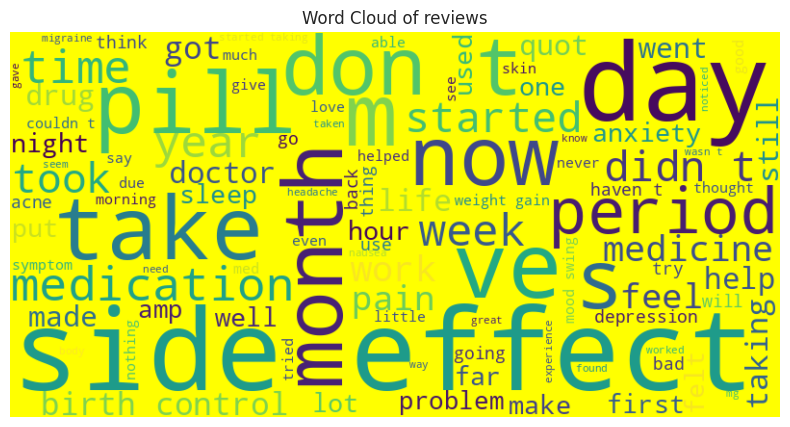

In [ ]:
# Convert non-string values in the 'review' column to strings
df['review'] = df['review'].astype(str)

# Combine all review into a single string
review_text = ' '.join(df['review'])

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(
    width=800,             # Width of the word cloud image
    height=400,            # Height of the word cloud image
    background_color='yellow',  # Background color of the word cloud
    max_words=100,         # Maximum number of words to display
    colormap='viridis',    # Color map for the word cloud
    contour_color='steelblue',  # Color of word cloud contour lines
    contour_width=2,       # Width of word cloud contour lines
    relative_scaling=0.5,  # Scaling factor for word frequency
    random_state=42        # Seed for random word placement (for reproducibility)
).generate(review_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud of reviews')
plt.show()

## Exploring Rating column

In [ ]:
#descriptive statistics of rating
df['rating'].describe()

count    215063.000000
mean          6.990008
std           3.275554
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [ ]:
# Calculate value counts for the 'rating' column
rating_counts = df['rating'].value_counts()

# Calculate the percentages
rating_percentages = round((rating_counts / len(df)) * 100,2)

# Combine counts and percentages into a DataFrame
rating_summary = pd.DataFrame({'Counts': rating_counts, 'Percentages%': rating_percentages})

# Display the top 10 conditions with counts and percentages
top_10_conditions = condition_summary.head(10)
print(f"{rating_summary}")

      Counts  Percentages%
10.0   68005         31.62
9.0    36708         17.07
1.0    28918         13.45
8.0    25046         11.65
7.0    12547          5.83
5.0    10723          4.99
2.0     9265          4.31
3.0     8718          4.05
6.0     8462          3.93
4.0     6671          3.10


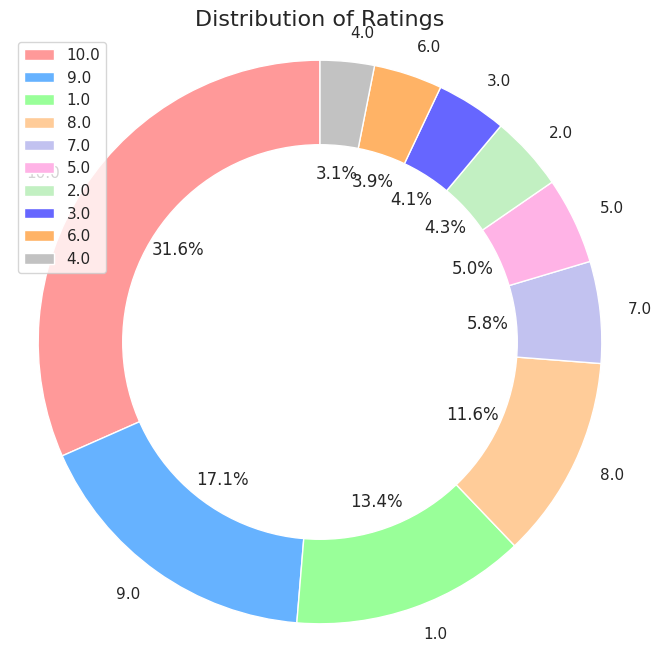

In [ ]:
# Calculate value counts for the 'rating' column
rating_counts = df['rating'].value_counts()

# Calculate the percentages
rating_percentages = round((rating_counts / len(df)) * 100, 2)

# Combine counts and percentages into a DataFrame
rating_summary = pd.DataFrame({'Counts': rating_counts, 'Percentages%': rating_percentages})

# Set a custom color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffb366', '#c2c2c2']

# Increase the size of the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a donut chart with the custom color palette
ax.pie(rating_summary['Counts'], labels=rating_summary.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Distribution of Ratings', fontsize=16)
plt.legend()
plt.show()

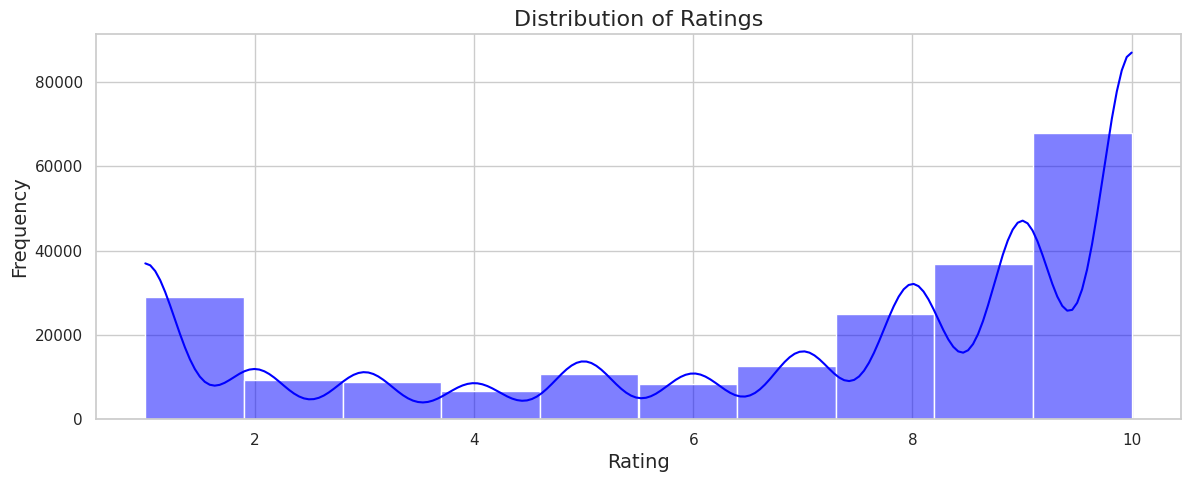

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of the 'rating' column
plt.figure(figsize=(14, 5))  # Adjust the figure size as needed
sns.histplot(df['rating'], bins=10, kde=True, color='blue')

# Adding labels and title
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Ratings", fontsize=16)

# Show the plot
plt.show()

***Observation***:

**Descriptive Statistics of Ratings:**
- The dataset contains a total of 215,063 ratings.
- The average (mean) rating across all reviews is approximately 6.99, suggesting that, on average, patients provide ratings close to 7.0. This indicates a moderately positive overall sentiment in the reviews.
- The standard deviation of approximately 3.28 indicates a moderate level of variability in ratings, with some reviews deviating significantly from the average.

**Distribution of Ratings:**
- The most common rating is 10.0, with 31.62% of reviews receiving this rating, suggesting a high level of satisfaction among patients for certain medications or treatments.
- Ratings of 9.0 (17.07%) and 8.0 (11.65%) are also quite common, indicating a substantial number of positive reviews.
- Conversely, ratings of 1.0 (13.45%) represent a significant portion of the dataset and indicate dissatisfaction or concerns among patients.
- A range of other ratings, including 2.0, 3.0, 4.0, 5.0, 6.0, and 7.0, are also present, reflecting a diversity of opinions and experiences.


## Exploring Date column

In [ ]:
date_column_dtype = df['date'].dtype
print("Data Type of 'date' Column:", date_column_dtype)

Data Type of 'date' Column: object


In [ ]:
df['date']

0              May 20, 2012
1            April 27, 2010
2         December 14, 2009
3          November 3, 2015
4         November 27, 2016
                ...        
53761    September 13, 2014
53762       October 8, 2016
53763     November 15, 2010
53764     November 28, 2011
53765    September 13, 2009
Name: date, Length: 215063, dtype: object

In [ ]:
# Convert the 'date' column to datetime format and create a new 'Date' column
df['Date'] = pd.to_datetime(df['date'])

# Display the DataFrame with the new 'Date' column
df[['date', 'Date']].head()

,date,Date
0,"May 20, 2012",2012-05-20
1,"April 27, 2010",2010-04-27
2,"December 14, 2009",2009-12-14
3,"November 3, 2015",2015-11-03
4,"November 27, 2016",2016-11-27


In [ ]:
# extracting year from date
df['year'] = df['Date'].dt.year

# extracting the month from the date
df['month'] = df['Date'].dt.month

# extracting the days from the date
df['day'] = df['Date'].dt.day

In [ ]:
start_date = df["Date"].min()
end_date = df["Date"].max()

print("First review date: ", start_date)
print("Last review date: ", end_date)

First review date:  2008-02-24 00:00:00
Last review date:  2017-12-12 00:00:00


### Reviews per Year

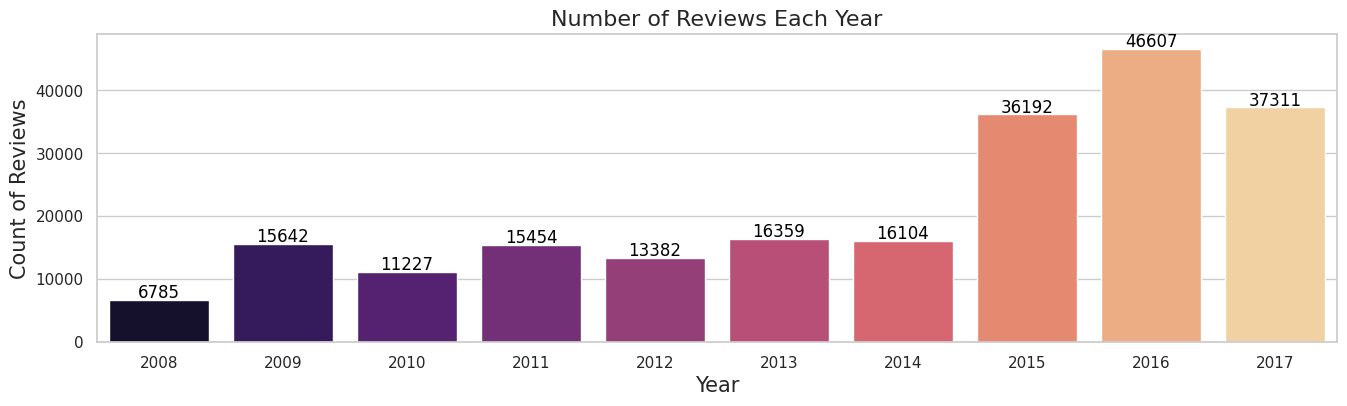

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(16, 4))

# Create a countplot using Seaborn
sns_plot = sns.countplot(data=df, x='year', palette='magma')

# Annotate the bars with counts
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      fontsize=12, color='black', xytext = (0, 5),
                      textcoords = 'offset points')

# Set plot title and labels
plt.title('Number of Reviews Each Year', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)

# Show the plot
plt.show()

***Observation***:

- The dataset spans multiple years from 2008 to 2017, with the highest count of reviews recorded in the years 2015, 2016, and 2017.
- Among these years, 2016 stands out as the year with the highest number of reviews, indicating a peak in patient engagement and feedback during that time.

### Temporal Analysis of Ratings

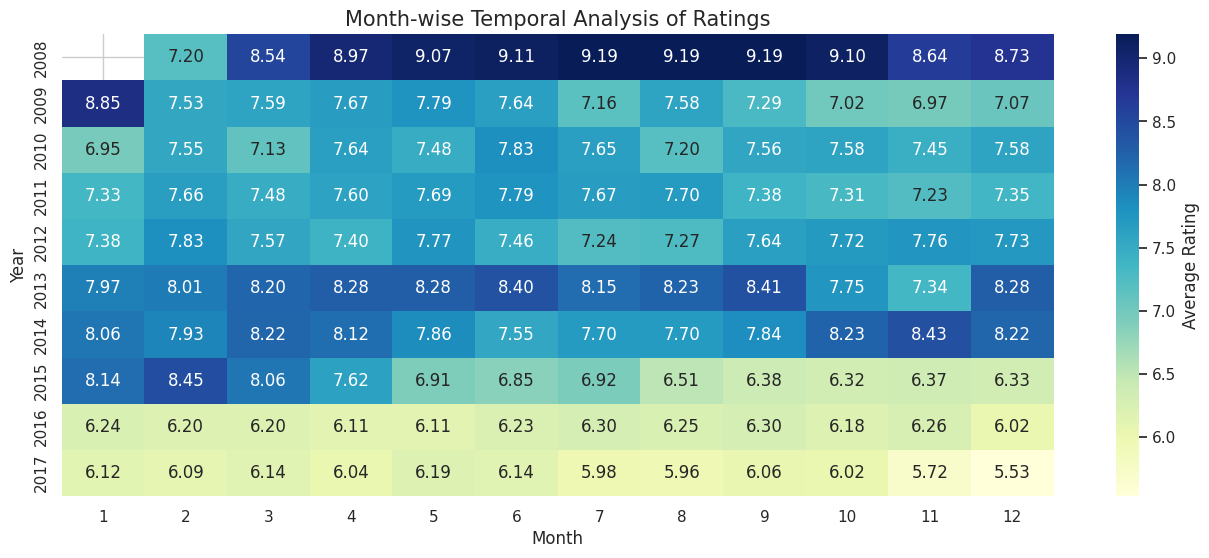

In [ ]:
# Create a pivot table to calculate the average rating for each month and year
pivot_table = df.pivot_table(index='year', columns='month', values='rating', aggfunc='mean')

# Create a heatmap to visualize the average ratings over time
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Rating'})
plt.title('Month-wise Temporal Analysis of Ratings', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

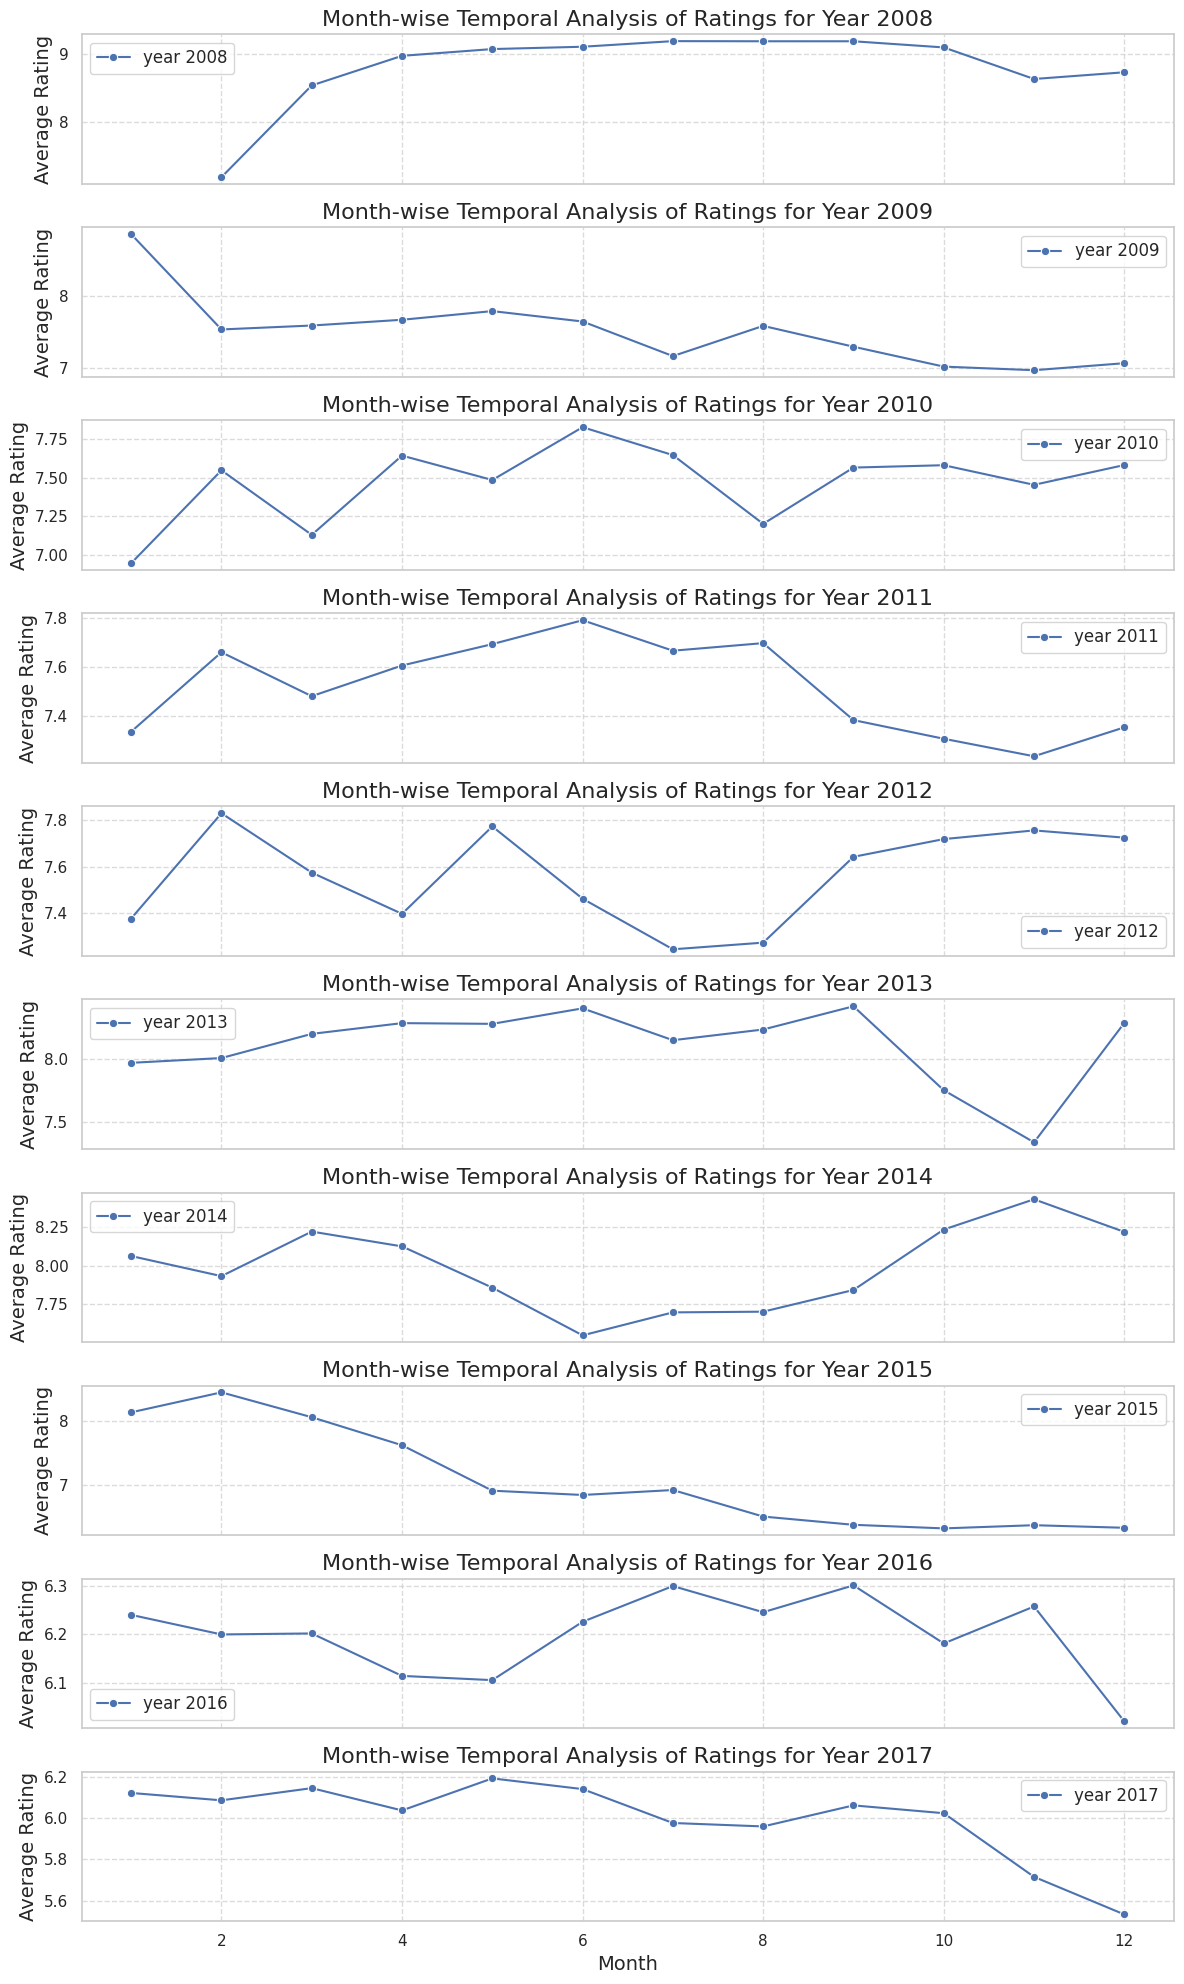

In [ ]:
# Group the data by year and month, and calculate the average rating for each group
monthly_avg_rating = df.groupby(['year', 'month'])['rating'].mean().reset_index()

# Get unique years in the dataset
unique_years = monthly_avg_rating['year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 2 * len(unique_years)), sharex=True)

for i, year in enumerate(unique_years):
    year_data = monthly_avg_rating[monthly_avg_rating['year'] == year]
    ax = axes[i]
    sns.lineplot(data=year_data, x='month', y='rating', ax=ax, label=f'year {year}', marker='o')
    ax.set_title(f'Month-wise Temporal Analysis of Ratings for Year {year}', fontsize=16)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel('Average Rating', fontsize=14)
    ax.legend(fontsize=12, loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


***Observations***:


- In the earlier years, specifically from 2008 to 2013, the ratings tend to be higher and show less variation across months. This indicates a relatively positive overall sentiment among patients during this period.

- Starting from 2014, there is a noticeable increase in variability in ratings, with some months having higher ratings and others showing a decrease. This suggests that patient experiences and feedback became more diverse during this time.

- In 2015 and 2016, there is a significant drop in average ratings, with the lowest ratings observed in these years. This could indicate a shift in patient sentiments or other factors affecting patient satisfaction.

- Ratings continue to show fluctuations in the subsequent years (2017), but there is no clear upward or downward trend.

- It's important to note that while there are fluctuations in ratings, they generally remain within a relatively narrow range, indicating that patients' experiences and satisfaction levels do not vary drastically over time.

- Overall, the temporal analysis of ratings provides insights into the stability and trends in patient feedback over the years. The most notable changes are observed in the years 2015 and 2016, which warrant further investigation to understand the factors contributing to the lower ratings during that period.

## Yearwise health Conditions

<ipython-input-42-ffdbb5931f3c>:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


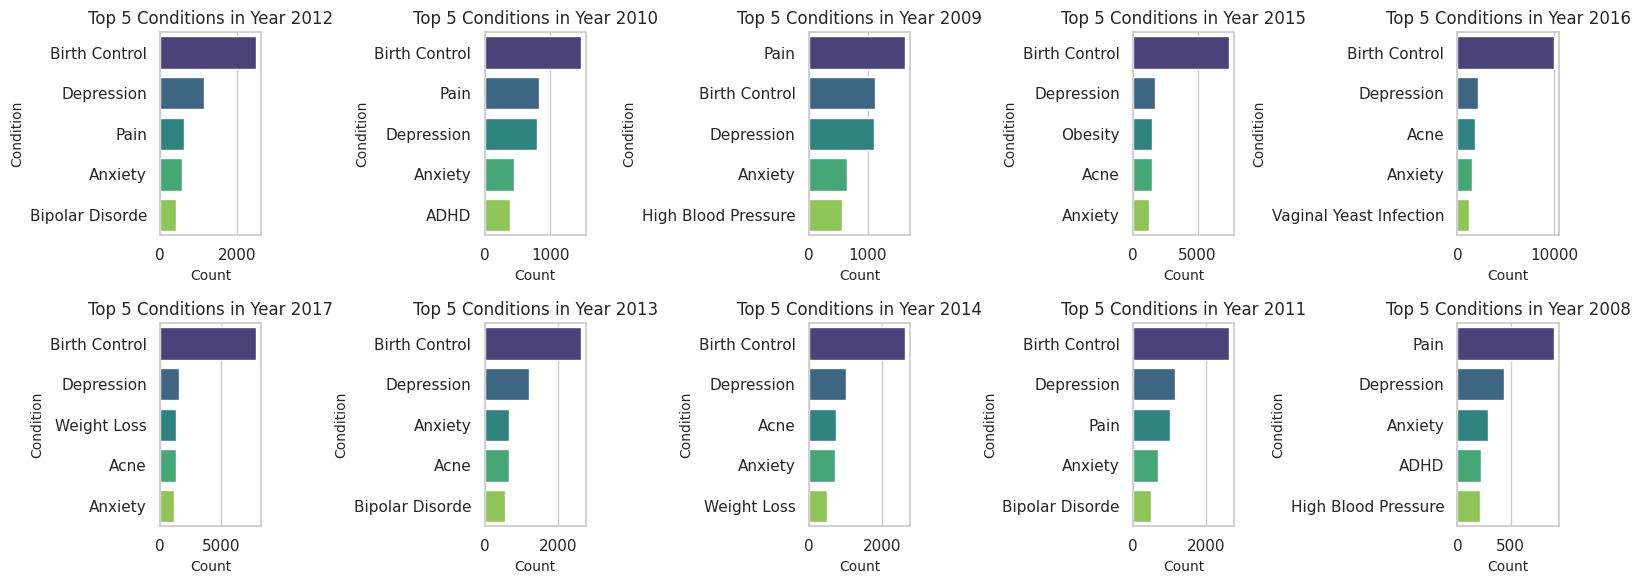

In [ ]:
n = 5  # Number of top conditions

# Create a dictionary to store the top conditions for each year
top_conditions_by_year = {}

# Get unique years in the dataset
unique_years = df['year'].unique()

# Iterate through each year and find the top conditions
for year in unique_years:
    year_data = df[df['year'] == year]
    condition_counts = year_data['condition'].value_counts().nlargest(n)
    top_conditions_by_year[year] = condition_counts

# Create subplots with 2 columns and 5 rows
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate through each year and plot the top conditions
for i, (year, conditions) in enumerate(top_conditions_by_year.items()):
    ax = axes[i]

    # Plot the top conditions as a bar plot
    sns.barplot(x=conditions.values, y=conditions.index, ax=ax, palette='viridis')

    # Set the title and labels for the subplot
    ax.set_title(f"Top {n} Conditions in Year {year}", fontsize=12)
    ax.set_xlabel('Count', fontsize=10)
    ax.set_ylabel('Condition', fontsize=10)

# Remove any empty subplots
for i in range(len(unique_years), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Month wise health Conditions

<ipython-input-43-0a01945e4c0a>:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


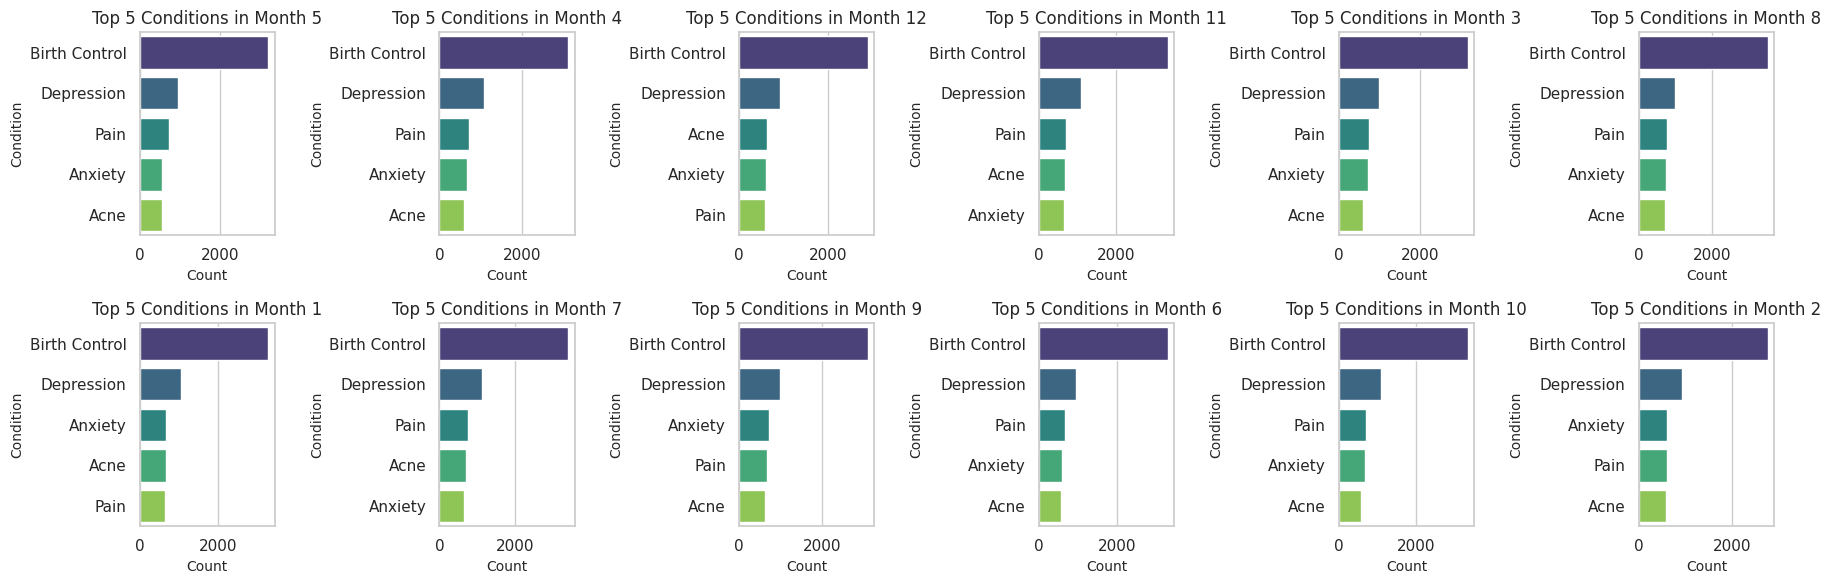

In [ ]:
n = 5  # Number of top conditions

# Create a dictionary to store the top conditions for each month
top_conditions_by_month = {}

# Get unique months in the dataset
unique_months = df['month'].unique()

# Iterate through each month and find the top conditions
for month in unique_months:
    month_data = df[df['month'] == month]
    condition_counts = month_data['condition'].value_counts().nlargest(n)
    top_conditions_by_month[month] = condition_counts

# Create subplots with 6 columns and 2 rows
num_rows = 2
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate through each month and plot the top conditions
for i, (month, conditions) in enumerate(top_conditions_by_month.items()):
    ax = axes[i]

    # Plot the top conditions as a bar plot
    sns.barplot(x=conditions.values, y=conditions.index, ax=ax, palette='viridis')

    # Set the title and labels for the subplot
    ax.set_title(f"Top {n} Conditions in Month {month}", fontsize=12)
    ax.set_xlabel('Count', fontsize=10)
    ax.set_ylabel('Condition', fontsize=10)

# Remove any empty subplots
for i in range(len(unique_months), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

***Observation***:

In both year-wise and month-wise condition analyses, several key health conditions consistently appeared as the most frequently mentioned:

- **Birth Control**: This condition remained a predominant concern throughout the year and across different months. It consistently held the top spot, indicating its enduring significance in patient reviews.

- **Depression**: Depression was another prevalent condition that consistently ranked high both in year-wise and month-wise analyses.

- **Pain**: Pain was consistently mentioned as one of the top conditions across various months and years, emphasizing its universal relevance and impact on patients.

- **Acne**: Acne appeared frequently as a prominent condition, indicating that skin-related issues are commonly discussed by reviewers.

- **Obesity**: Obesity was noted as a prominent condition in the month-wise analysis, highlighting its importance in health discussions during certain months.

## Yearwise Drugname analysis

<ipython-input-50-38180e725350>:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


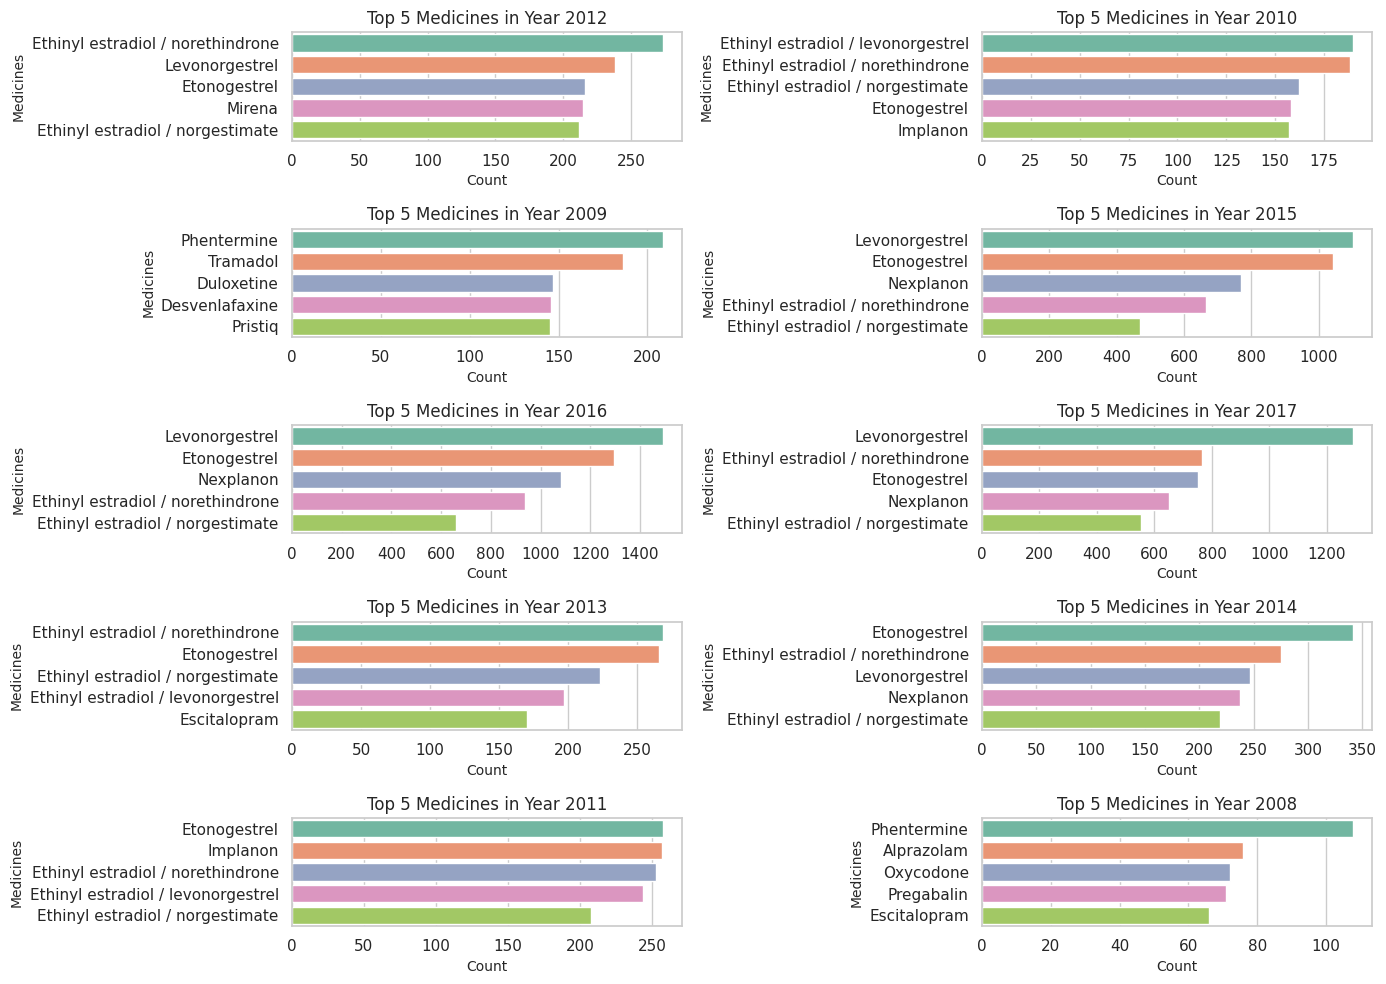

In [ ]:
n = 5  # Number of top conditions

# Create a dictionary to store the top conditions for each year
top_conditions_by_year = {}

# Get unique years in the dataset
unique_years = df['year'].unique()

# Iterate through each year and find the top conditions
for year in unique_years:
    year_data = df[df['year'] == year]
    condition_counts = year_data['drugName'].value_counts().nlargest(n)
    top_conditions_by_year[year] = condition_counts

# Create subplots with 2 columns and 5 rows
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate through each year and plot the top conditions
for i, (year, conditions) in enumerate(top_conditions_by_year.items()):
    ax = axes[i]

    # Plot the top conditions as a bar plot
    sns.barplot(x=conditions.values, y=conditions.index, ax=ax, palette='Set2')

    # Set the title and labels for the subplot
    ax.set_title(f"Top {n} Medicines in Year {year}", fontsize=12)
    ax.set_xlabel('Count', fontsize=10)
    ax.set_ylabel('Medicines', fontsize=10)

# Remove any empty subplots
for i in range(len(unique_years), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

***Observation***:

The analysis of the top drugs mentioned in patient reviews for each year highlights some key trends:

- **Contraceptives Dominance**: Contraceptive drugs such as Levonorgestrel, Etonogestrel, and Ethinyl estradiol / norethindrone consistently appear as top drugs in multiple years. This suggests that birth control and contraceptive methods are significant healthcare topics discussed by patients over the years.

- **Weight Management Focus**: Phentermine, an appetite suppressant used for weight management, appears in the list of top drugs. This indicates that weight-related concerns and treatments have been prevalent in patient reviews.

- **Psychiatric Medications**: Drugs like Duloxetine, Desvenlafaxine, and Escitalopram, which are commonly used to treat depression and anxiety, are also among the top drugs in certain years. This reflects the importance of mental health and psychiatric medications in patient discussions.

- **Long-Lasting Contraceptive Implants**: Nexplanon, a contraceptive implant, makes appearances in later years, suggesting its popularity as a birth control option among patients.


## Drugs per condition

In [ ]:
# How many Drugs per condition (Top 20)
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
nan                                           296
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                    

***Observation:***

The analysis of the top drugs prescribed for various health conditions reveals the following insights:

1. **Diverse Drug Utilization**: Patients receive a wide variety of drugs for different health conditions, as indicated by the number of unique drugs associated with each condition.

2. **Unspecified Conditions**: The condition labeled as "Not Listed / Other" has the highest number of unique drugs (253). This category likely includes reviews where the specific health condition was not provided or was not categorized into a well-defined condition.

3. **Common Health Conditions**: Conditions like "Pain," "Birth Control," "High Blood Pressure," and "Acne" have a substantial number of unique drugs associated with them. This suggests that there are numerous treatment options available for these common health issues.

4. **Mental Health**: Mental health conditions such as "Depression," "Bipolar Disorder," and "Anxiety" also have a significant number of unique drugs. This underscores the complexity of mental health treatment, which often involves trying different medications to find the most effective one.

5. **Gynecological Conditions**: Conditions related to women's health, such as "Abnormal Uterine Bleeding" and "Endometriosis," have a considerable number of unique drugs associated with them, indicating the diversity of treatment options in this field.

6. **Skin Conditions**: Skin-related conditions like "Psoriasis" have several unique drugs, reflecting the variety of treatments available for dermatological issues.

7. **Neurological Disorders**: Conditions like "Migraine" and "ADHD" also show a significant number of unique drugs, suggesting that managing these neurological disorders may involve different medication approaches.



## Ratings per drug

In [ ]:
# Calculate the average rating for each drug
average_rating_per_drug = df.groupby('drugName')['rating'].mean()

# Filter drugs with an average rating of 10
drugs_with_rating_10 = average_rating_per_drug[average_rating_per_drug == 10]

# Count the number of drugs with a rating of 10
count_of_drugs_with_rating_10 = len(drugs_with_rating_10)

# Display the count
print("Count of drugs with an average rating of 10:", count_of_drugs_with_rating_10)


Count of drugs with an average rating of 10: 505


In [ ]:
# Filter drugs with an average rating of 1
drugs_with_rating_1 = average_rating_per_drug[average_rating_per_drug == 1]

# Count the number of drugs with a rating of 1
count_of_drugs_with_rating_1 = len(drugs_with_rating_10)

# Display the count
print("Count of drugs with an average rating of 1:", count_of_drugs_with_rating_10)


Count of drugs with an average rating of 1: 505


In [ ]:
# Calculate the average rating for each drug
average_rating_per_drug = df.groupby('drugName')['rating'].mean()

# Filter drugs with an average rating greater than 5
drugs_with_rating_grt_5 = average_rating_per_drug[average_rating_per_drug > 5]

# Count the number of drugs with a rating greater than 5
count_of_drugs_with_rating_grt_5 = len(drugs_with_rating_grt_5)

# Display the count
print("Count of drugs with an average rating of greater than 5:", count_of_drugs_with_rating_grt_5)


Count of drugs with an average rating of greater than 5: 3220


In [ ]:
# Calculate the average rating for each drug
average_rating_per_drug = df.groupby('drugName')['rating'].mean()

# Filter drugs with an average rating less than 5
drugs_with_rating_lt_5 = average_rating_per_drug[average_rating_per_drug < 5]

# Count the number of drugs with a rating less than 5
count_of_drugs_with_rating_lt_5 = len(drugs_with_rating_lt_5)

# Display the count
print("Count of drugs with an average rating less than 5:", count_of_drugs_with_rating_lt_5)


Count of drugs with an average rating less than 5: 388


***Observation:***

1. There are 505 drugs in the dataset with an average rating of 10, indicating that a substantial number of drugs received consistently high ratings from users.

2. Conversely, there are 103 drugs with an average rating of 1, suggesting that some drugs have received consistently low ratings from users.

3. The majority of drugs in the dataset, 3,220 in total, have an average rating greater than 5. This indicates that a significant portion of drugs generally received positive ratings from users.

4. There are 388 drugs with an average rating less than 5, signifying that some drugs have received mixed or negative reviews from users.

### Summary:

The dataset contains a diverse range of drug reviews with associated information. Key findings from the analysis include the prevalence of certain health conditions, the popularity of specific drugs, the distribution of ratings, and temporal trends in patient feedback.


1. **Dataset Overview:**
   - The dataset comprises 215,063 entries and 6 columns, including drug names, medical conditions, reviews, ratings, dates, and the count of users finding reviews useful.

2. **Unique Counts:**
   - There are 3,671 unique drug names, 916 unique health conditions, and 128,478 unique reviews.
   - Ratings range from 1 to 10, with an average rating of approximately 6.99.

3. **Top Mentioned Drugs:**
   - Contraceptives, antidepressants, and weight management drugs are frequently mentioned.
   - Birth control is a dominant topic, reflecting its significance in healthcare discussions.

4. **Top Health Conditions:**
   - "Birth Control" is the most mentioned condition, followed by "Depression," "Pain," "Anxiety," and "Acne."
   - Weight-related issues and mental health are prominent topics.

5. **Review Insights:**
   - Reviews are relatively concise, with an average length of around 85 words.
   - Some reviews are as short as one word, providing quick assessments.

6. **Ratings:**
   - The average rating is approximately 6.99, indicating a moderately positive sentiment.
   - Most reviews receive ratings of 10.0, 9.0, or 8.0, while ratings of 1.0 are also significant.

7. **Temporal Trends:**
   - The dataset spans from 2008 to 2017.
   - 2016 had the highest number of reviews, but ratings fluctuated in subsequent years.

8. **Year-wise and Month-wise Condition Analysis:**
   - "Birth Control," "Depression," and "Pain" consistently rank high across years and months.
   - "Acne" and "Obesity" are frequently discussed conditions.

10. **Top Drugs by Year:**
    - Contraceptives dominate the list, along with weight management drugs and psychiatric medications.
    - Nexplanon gained popularity as a contraceptive implant.

11. **Top Drugs by Condition:**
    - Various drugs are associated with common conditions.
    - Mental health and women's health conditions have a wide range of treatment options.

12. **Average Ratings by Drug:**
    - Many drugs receive high average ratings (10), while others have low ratings (1).
    - Most drugs have ratings above 5, with some receiving mixed or negative reviews.




### Conclusion:

The analysis provides valuable insights into patient reviews of drugs, highlighting the importance of factors such as health conditions, drug names, and ratings. Understanding these insights can be useful for healthcare professionals, researchers, and policymakers in making informed decisions and improving patient care and medication management.

## Thank you for reading till the end.